In [1]:
import sklearn
import numpy as np
import pandas as pd
from ast import literal_eval

In [2]:
data = pd.read_csv('../Data_final/cleaned_data/final_data.csv', converters={'feedbacks': literal_eval})

In [3]:
string_columns = ['name', 'qualification', 'clinic_address', 'current_url', 'feedbacks', 'reviews_score_index']

In [4]:
numeric_columns = list(set(data.columns) - set(string_columns))

In [5]:
data_numeric = data[numeric_columns]

In [6]:
X_score = data_numeric.loc[:, data_numeric.columns != 'score']
Y_score = data_numeric.loc[:, data_numeric.columns == 'score']

X_sentiment = data_numeric.loc[:, data_numeric.columns != 'doc_review_score_index']
Y_sentiment = data_numeric.loc[:, data_numeric.columns == 'doc_review_score_index']

In [7]:
from sklearn.model_selection import train_test_split
X_score_train, X_score_test, Y_score_train, Y_score_test = train_test_split(X_score, Y_score, test_size=0.1, random_state=42)
X_sentiment_train, X_sentiment_test, Y_sentiment_train, Y_sentiment_test = train_test_split(X_sentiment, Y_sentiment, test_size=0.1, random_state=42)

In [8]:
def score_model(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_score_train, Y_score_train)
pred = model.predict(X_score_test)
score_model(Y_score_test, pred)

{'mse': 0.009888532308960939,
 'rmse': 0.09944109969706157,
 'r2': 0.1173718421378428}

In [10]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(8, 4, 2))
model.fit(X_score_train, Y_score_train)
pred = model.predict(X_score_test)
score_model(Y_score_test, pred)

/home/parth20/anaconda3/envs/computer_vision/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/parth20/anaconda3/envs/computer_vision/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'mse': 2.4731599833283875,
 'rmse': 1.5726283678378652,
 'r2': -219.74869879379594}

In [8]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sbn
model = KMeans(n_clusters=13)
model.fit(X_sentiment_train)
tsne = TSNE(n_components=2)
X_sentiment_train_tsne = tsne.fit_transform(X_sentiment_train)
X_sentiment_train_tsne_df = pd.DataFrame(X_sentiment_train_tsne, columns=['x', 'y'])
X_sentiment_train_tsne_df['hue'] = X_sentiment_train['domain']

/home/parth20/anaconda3/envs/computer_vision/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/parth20/anaconda3/envs/computer_vision/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


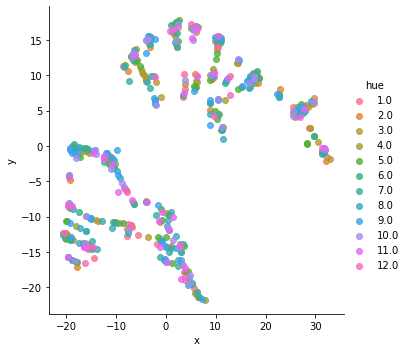

In [11]:
sbn.lmplot(data=X_sentiment_train_tsne_df, x='x', y='y', hue='hue', fit_reg=False)

In [9]:
def adjusted_rand_index(labels, clusters):
    return sklearn.metrics.adjusted_rand_score(labels, clusters)

def adjusted_mutual_information(labels, clusters):
    return sklearn.metrics.adjusted_mutual_info_score(labels, clusters)

def fowlkes_mallows_score(labels, clusters):
    return sklearn.metrics.fowlkes_mallows_score(labels, clusters)

def completeness_score(labels, clusters):
    return sklearn.metrics.completeness_score(labels, clusters)

def find_silhouette_score(X, clusters):
    return sklearn.metrics.silhouette_score(X, clusters)
    
def find_DB_Index(X, clusters):
    return sklearn.metrics.davies_bouldin_score(X, clusters)

def calinski_harabasz_index(X, clusters):
    return sklearn.metrics.calinski_harabasz_score(X, clusters)



def extrinsic_scores(labels, clusters):
    return {
        # 'fowlkes_mallows_score': fowlkes_mallows_score(labels, clusters),
        # 'completeness_score': completeness_score(labels, clusters),
        'adjusted_rand_index': adjusted_rand_index(labels, clusters),
        'mutual_information': adjusted_mutual_information(labels, clusters)
    }

def intrinsic_scores(X, clusters):
    return{
        'silhouette score': find_silhouette_score(X, clusters),
         'calinski_harabasz_index': calinski_harabasz_index(X, clusters),
         'DB index': find_DB_Index(X, clusters)
    }

In [10]:
print(intrinsic_scores(X_sentiment_train, model.labels_))

{'silhouette score': 0.41596090078519055, 'calinski_harabasz_index': 1159.0273402269274, 'DB index': 0.6868975436149852}
